# Cuaderno de tareas
#### Yerson Danilo Chilito Inga
- - -
1. **Problema:** En una cena hay cuatro personas, y queremos sentarlas alrededor de una mesa de forma que cada una de ellas conozca a las dos personas que tiene al lado. ¿Es posible hacerlo si cada persona conoce al menos a dos personas?

Para resolver esta pregunta, observemos todos los posibles grafos de 4 nodos donde cada nodo tiene un grado mayor o igual a 2. En este contexto, los nodos representan a las personas, y las aristas indican que una persona conoce a otra.

-Graphics-
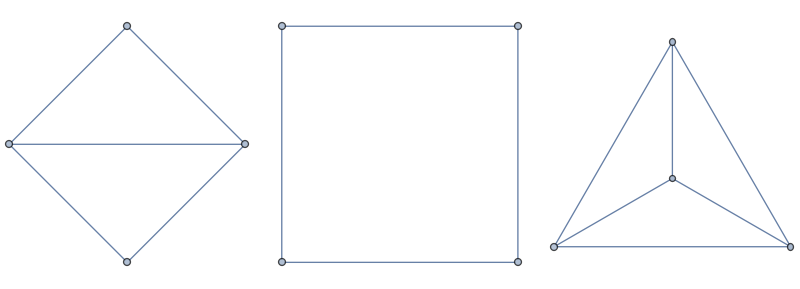

In [1]:
(*Obtiene todos los posibles grafos no dirigidos 
y no isomorfos de 4 nodos de una base de datos*)
graphs4 = GraphData /@ GraphData[4];
(*Selecciona solo aquellos grafos en los que sus 
nodos tienen un grado mayor o igual a 2*)
filter4 = Select[graphs4, Min[VertexDegree[#]] >= 2 &];

GraphicsGrid[Partition[Table[filter4], 3]]

Visualmente, podemos concluir que siempre es posible organizar a las personas de tal manera. Ahora, la pregunta es: si hay 5 personas, ¿a cuántas personas debe conocer como mínimo cada una? Para responder, observemos nuevamente los posibles grafos de 5 nodos con grados mayores o iguales a 2.

-Graphics-
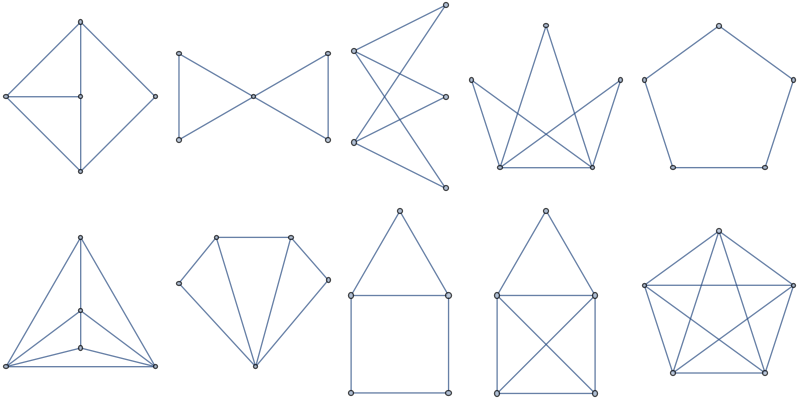

In [6]:
graphs5 = GraphData /@ GraphData[5];
filter5 = Select[graphs5, Min[VertexDegree[#]] >= 2 &];

GraphicsGrid[Partition[Table[filter5], 5]]

En el segundo grafo generado en la lista anterior, observamos que esta configuración no cumple con los requisitos del problema. Es decir, en este caso las personas no podrían sentarse de manera que cada una conozca a las dos personas que tiene al lado.

Para responder a la pregunta de forma definitiva, utilizaremos un algoritmo.

In [9]:
i = 2;

(*Selecciona aquellos grafos en el que todos sus vertices 
tienen como minimo grado m*)
filteredGraphs[m_] := Select[graphs5, Min[VertexDegree[#]] >= m &]

(*Toma de una lista de grafos solo aquellos que son hamiltonianos*)
listHam[list_] := TakeWhile[list, HamiltonianGraphQ]

(*Verifica si todos los grafos de una lista son hamiltonianos*)
condition[i_] :=
    Module[{filter},
        filter  = filteredGraphs[i];
        If[Length[filter] != Length[listHam[filter]],
            True, 
            False
        ]
    ]
    
(*Busca desde 2 en adelante el grado del grafo que cumple lo buscado*)
While[condition[i], i++]

Print[i]

3


Este algoritmo calcula el grado mínimo $m$ que debe tener cada vértice para que el grafo resultante sea hamiltoniano. En otras palabras, nos permite determinar el número mínimo de personas que debe conocer cada individuo para garantizar que siempre sea posible organizar a las personas de modo que cada una esté sentada entre dos personas que conoce.

A continuación, veremos una variación de este algoritmo que nos indica cuántas personas deben conocer como mínimo, dependiendo de la cantidad de personas presentes.

In [20]:
graphs[nodes_] := GraphData /@ GraphData[nodes]

(*Selecciona de una lista de grafos (de 4 a 14 nodos)
aquellos en el que todos sus vertices tienen como minimo grado m*)
filteredGraphs1[n_, m_] :=
    Module[{graph},
        graph = Switch[n,
            4, graphs4,
            5, graphs5,
            6, graphs6,
            7, graphs7,
            8, graphs8,
            9, graphs9,
            10, graphs10,
            11, graphs11,
            12, graphs12,
            13, graphs13,
            14, graphs14
        ];
        Select[graph, Min[VertexDegree[#]] >= m &]
    ]

(*Verifica si todos los grafos de una lista son hamiltonianos*)
condition1[n_, i_] :=
    Module[{filter},
        filter  = filteredGraphs1[n, i];
        If[Length[filter] != Length[listHam[filter]],
            True, 
            False
        ]
    ]
(*Retorna  el grado minimo*)
fun[nodes_] := 
    For[i = 2, i < nodes, i++,
        If[condition1[nodes, i] == False,
            Return[i]; 
            i = nodes + 1
        ]
    ]

In [27]:
(*Lista de grafos*)
graphs6 = graphs[6];
graphs7 = graphs[7];
graphs8 = graphs[8];
graphs9 = graphs[9];
graphs10 = graphs[10];
graphs11 = graphs[11];
graphs12 = graphs[12];
graphs13 = graphs[13];
graphs14 = graphs[14];

nodes   minDegree

4       2

5       3

6       3

7       4

8       4

9       5

10      5

11      6

12      6

13      7

14      7
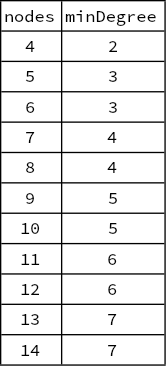

In [37]:
Grid[
    {,}, 
    Frame -> All,
    Alignment -> Center
]

En los 11 casos analizados, observamos que el grado mínimo (la cantidad de personas que debe conocer cada individuo) es mayor o igual a $n/2$, donde $n$ representa el número de nodos, o en nuestro caso, el número de personas. Si extendemos este análisis, obtenemos los mismos resultados.

2. **Algoritmo de Havel-Hakimi**

Este algoritmo permite determinar si un grafo es graficable. En primer lugar, es importante recordar que la existencia de un grafo está regida por un teorema de existencia. Según este teorema, para que un grafo sea posible, el número de vértices con grado impar debe ser par. Además, debe cumplirse que la suma de los grados de todos los vértices sea un número par. Sin embargo, el cumplimiento de estas dos condiciones no garantiza que el grafo sea grafiable. Por esta razón, se recurre al teorema de Havel-Hakimi para verificar su viabilidad de representación gráfica.

In [38]:
(*Verifica el teorema de existencia para una sucesión de grados*)
existence[list_] := Divisible[Length[Select[list, OddQ]], 2]

(*Verifica si la suma de una lista es par*)
sumEven[list_] := Divisible[Total[list], 2]

hakimiAlgorithm[list_] :=
    Module[{l, n},
        l = list;
        If[existence[l] && sumEven[l] && Max[l] <= Length[l] - 1,
            (* Bucle que sigue reduciendo la lista (l) hasta que
            todos los elementos sean 0 o si algún valor es negativo *)
            While[!(Length[Select[l, #<0 &]] > 0) && Count[l, 0] != Length[l],
                l = Sort[l, Greater];
                n = l[[1]];
                l = Delete[l, 1];
                For[j = 1, j <= n, j++,
                    l[[j]] = l[[j]] - 1
                ] (*;Print["Pasos: ", l]*)
            ];
            (* Verifica el estado final de la lista *)
            If[!(Length[Select[l, #<0 &]] > 0) && Count[l, 0] == Length[l],
                Print["La sucesion ", list, " es graficable, he aqui un ejemplo:"];
                RandomGraph[DegreeGraphDistribution[list], VertexLabels -> "Name"],
                Print["La sucesion ", list, " no es graficable"]
            ],
            Print["La sucesion ", list, " no cumple los requisitos basicos"]
        ]
    ]

La sucesion {5, 2, 6, 5, 4, 4, 6} es graficable, he aqui un ejemplo:


Graph[<7>, <16>]
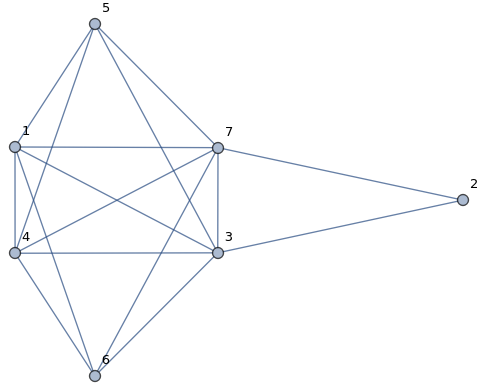

In [61]:
(*Genera una sucesion aleatoria de 1 a 6 con 7 elementos
y se verifica si es graficable*)
list1 = RandomInteger[{1, 6}, 7];
hakimiAlgorithm[list1]

3. Dado un grafo decidir si es o no bipartito, si lo es, retornar los conjuntos particionados.

-Graphics-
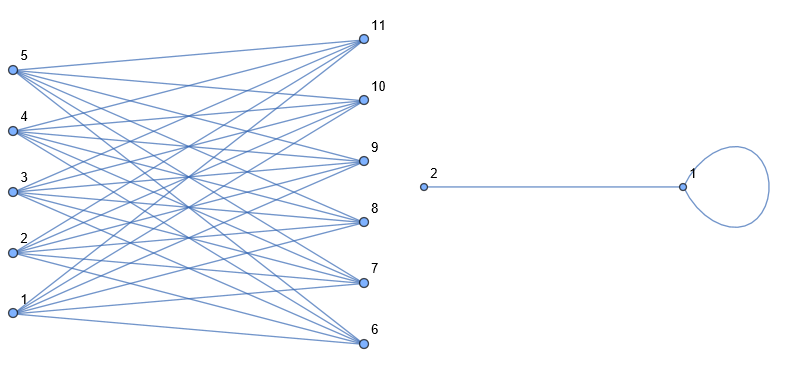

In [1]:
(*Grafo bipartito y no bipartito respectivamente*)
graphBipartite = CompleteGraph[{5,6}, VertexLabels -> "Name"];
nonBipartiteGraph = Graph[{1<->2, 1<->1}, VertexLabels -> "Name"];

GraphicsGrid[Partition[Table[{graphBipartite, nonBipartiteGraph}], 2]]

In [5]:
partition[g_] := Module[{vertex, u, v, c, list},
  vertex = VertexList[g]; 
  u = {};
  v = {};
  c = Complement[vertex, Join[u, v]]; (* Vértices que no están en u ni en v *)
  
  While[c != {}, (* Mientras haya vértices no asignados *)
    list = GraphDistance[g, c[[1]]]; (* Distancias de c[[1]] a todos los vértices *)
    
    (* Iteramos sobre la lista de distancias *)
    For[j = 1, j <= Length[list], j++,
      If[NumericQ[list[[j]]], (* Verificamos si la distancia es numérica *)
        If[EvenQ[list[[j]]], 
          AppendTo[u, vertex[[j]]], (* Si la distancia es par, lo asignamos a u *)
          AppendTo[v, vertex[[j]]]  (* Si la distancia es impar, lo asignamos a v *)
        ]
      ]
    ];
    
    c = Complement[vertex, Join[u, v]] (* Actualizamos c con los vértices no asignados *)
  ];
  
  {u, v} (* Devolvemos los dos conjuntos de vértices *)
]
(* Función que verifica si un grafo es bipartito y retorna la 
partición de conjuntos si es así *)
partitionedSets[graph_] :=
    Module[{partitions},
        If[BipartiteGraphQ[graph],
            partitions = partition[graph];
            Print["Los conjuntos particionados son:"];
            Print["U = ", partitions[[1]], " y V = ", partitions[[2]]],
            "No es un grafo bipartito"
        ]
    ]

In [8]:
partitionedSets[graphBipartite]

Los conjuntos particionados son:
U = {1, 2, 3, 4, 5} y V = {6, 7, 8, 9, 10, 11}


In [9]:
partitionedSets[nonBipartiteGraph]

No es un grafo bipartito

4. Calcular la proyección entre un grupo y otro en un grafo bipartito.

In [10]:
projection[graph_, setUorV_] :=
  Module[{set, l,projectedGraph, list, list1, added, list2},
  
    set = Switch[setUorV,
      U, partition[graph][[1]],
      V, partition[graph][[2]]
    ];
    l = Length[set];
    projectedGraph = Graph[{}];
    (* Lista de vecinos de cada vértice del conjunto seleccionado *)
    list = AdjacencyList[graph, #] & /@ set;
    (* Itera sobre cada vértice en el conjunto seleccionado (set). *)
    For[i = 1, i <= l, i++,
      
      list1 = list[[i]];
      added = False;
      
      (* Verifica si hay intersección entre vecinos de i y j *)
      For[j = i + 1, j <= l, j++,
        list2 = list[[j]];
        
          If[Intersection[list1, list2] != {},
            projectedGraph = EdgeAdd[projectedGraph, set[[i]] <-> set[[j]]];
            added = True
          ]
        
      ];
      
      (* Si el vértice no fue conectado a nadie, se agrega como nodo aislado *)
      If[!added,
        projectedGraph = VertexAdd[projectedGraph, set[[i]]]
      ]
    ];
    
    projectedGraph
  ]

projections[graph_, setUorV_] := 
    If[BipartiteGraphQ[graph],
        (* Según el valor de setUorV, calcula la proyección del conjunto U o V sobre el conjunto contrario. *)
        Switch[setUorV,
            U, Print["La proyeccion del conjunto U = ", partition[graph][[1]]," sobre V es: "]; 
            Graph[projection[graph,U], VertexLabels -> "Name"],
            V, Print["La proyeccion del conjunto V = ", partition[graph][[2]]," sobre U es: "]; 
            Graph[projection[graph,V], VertexLabels -> "Name"],
            _, "Conjunto Invalido"
        ],
        "No es un grafo bipartito"
    ]

La proyeccion del conjunto U = {1, 2, 3, 4, 5} sobre V es: 


Graph[<5>, <10>]
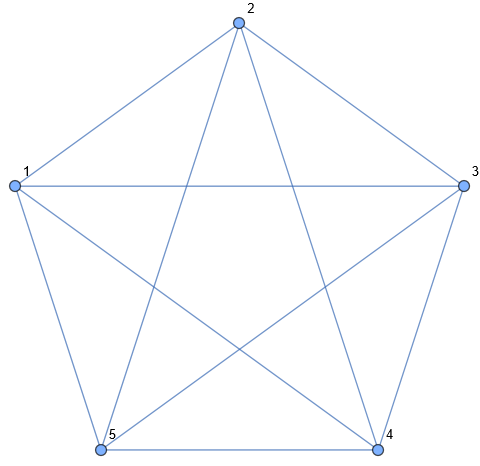

In [12]:
projections[graphBipartite, U]

La proyeccion del conjunto V = {6, 7, 8, 9, 10, 11} sobre U es: 


Graph[<6>, <15>]
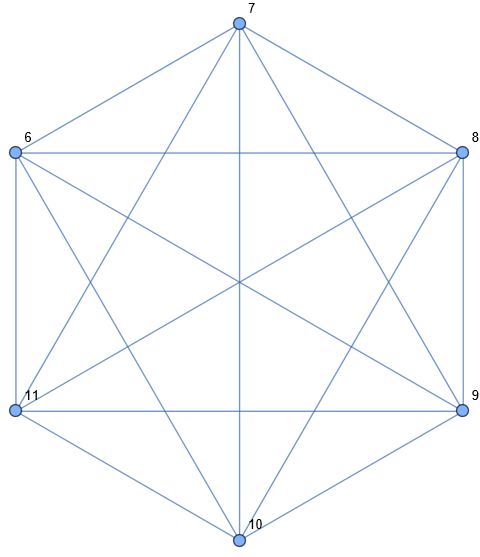

In [13]:
projections[graphBipartite, V]

In [14]:
projections[graphBipartite, 1]

Conjunto Invalido

In [15]:
projections[nonBipartiteGraph, 1]

No es un grafo bipartito